In [1]:
library(dplyr)
library(ggplot2)
library(rpart)
library(data.table)
library(randomForest)
library(corrplot)
library(StatMeasures)
library(rpart.plot)
library(caret)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'rpart' was built under R version 3.6.2"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine

corrplot 0.84 loaded
Warning message:
"package 'StatMeasures' was built under R version 3.6.2"Warning message:
"package 'rpart.plot' was built under R version 3.6.2"Loading required package: lattice


In [2]:
data <- read.csv('D:/DOCUMENT/R/Personaldata/pokemon_alopez247.csv')

In [3]:
summary(data)

     Number            Name         Type_1         Type_2        Total      
 Min.   :  1   Abomasnow :  1   Water  :105           :371   Min.   :180.0  
 1st Qu.:181   Abra      :  1   Normal : 93   Flying  : 87   1st Qu.:320.0  
 Median :361   Absol     :  1   Grass  : 66   Poison  : 31   Median :424.0  
 Mean   :361   Accelgor  :  1   Bug    : 63   Ground  : 30   Mean   :417.9  
 3rd Qu.:541   Aegislash :  1   Fire   : 47   Psychic : 27   3rd Qu.:499.0  
 Max.   :721   Aerodactyl:  1   Psychic: 47   Fighting: 19   Max.   :720.0  
               (Other)   :715   (Other):300   (Other) :156                  
       HP             Attack          Defense           Sp_Atk      
 Min.   :  1.00   Min.   :  5.00   Min.   :  5.00   Min.   : 10.00  
 1st Qu.: 50.00   1st Qu.: 53.00   1st Qu.: 50.00   1st Qu.: 45.00  
 Median : 65.00   Median : 74.00   Median : 65.00   Median : 65.00  
 Mean   : 68.38   Mean   : 75.01   Mean   : 70.81   Mean   : 68.74  
 3rd Qu.: 80.00   3rd Qu.: 95.00   3rd 

In [4]:
str(data)

'data.frame':	721 obs. of  23 variables:
 $ Number          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name            : Factor w/ 721 levels "Abomasnow","Abra",..: 68 295 670 87 88 86 595 688 54 82 ...
 $ Type_1          : Factor w/ 18 levels "Bug","Dark","Dragon",..: 10 10 10 7 7 7 18 18 18 1 ...
 $ Type_2          : Factor w/ 19 levels "","Bug","Dark",..: 15 15 15 1 1 9 1 1 1 1 ...
 $ Total           : int  318 405 525 309 405 534 314 405 530 195 ...
 $ HP              : int  45 60 80 39 58 78 44 59 79 45 ...
 $ Attack          : int  49 62 82 52 64 84 48 63 83 30 ...
 $ Defense         : int  49 63 83 43 58 78 65 80 100 35 ...
 $ Sp_Atk          : int  65 80 100 60 80 109 50 65 85 20 ...
 $ Sp_Def          : int  65 80 100 50 65 85 64 80 105 20 ...
 $ Speed           : int  45 60 80 65 80 100 43 58 78 45 ...
 $ Generation      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ isLegendary     : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ Color           : Factor w/ 10 levels "Black","Blue

In [6]:
data

Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,...,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<fct>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
6,Charizard,Fire,Flying,534,78,84,78,109,85,...,Red,True,0.875,Monster,Dragon,True,1.70,90.5,45,bipedal_tailed
7,Squirtle,Water,,314,44,48,65,50,64,...,Blue,True,0.875,Monster,Water_1,False,0.51,9.0,45,bipedal_tailed
8,Wartortle,Water,,405,59,63,80,65,80,...,Blue,True,0.875,Monster,Water_1,False,0.99,22.5,45,bipedal_tailed
9,Blastoise,Water,,530,79,83,100,85,105,...,Blue,True,0.875,Monster,Water_1,True,1.60,85.5,45,bipedal_tailed


In [7]:
names(data)

[1] "Number"           "Name"             "Type_1"           "Type_2"          
 [5] "Total"            "HP"               "Attack"           "Defense"         
 [9] "Sp_Atk"           "Sp_Def"           "Speed"            "Generation"      
[13] "isLegendary"      "Color"            "hasGender"        "Pr_Male"         
[17] "Egg_Group_1"      "Egg_Group_2"      "hasMegaEvolution" "Height_m"        
[21] "Weight_kg"        "Catch_Rate"       "Body_Style"

In [8]:
df <- data[c(5,6,7,8,9,10,11,13,15,20,21,22)]

In [21]:
str(df)

'data.frame':	721 obs. of  12 variables:
 $ Total      : int  318 405 525 309 405 534 314 405 530 195 ...
 $ HP         : int  45 60 80 39 58 78 44 59 79 45 ...
 $ Attack     : int  49 62 82 52 64 84 48 63 83 30 ...
 $ Defense    : int  49 63 83 43 58 78 65 80 100 35 ...
 $ Sp_Atk     : int  65 80 100 60 80 109 50 65 85 20 ...
 $ Sp_Def     : int  65 80 100 50 65 85 64 80 105 20 ...
 $ Speed      : int  45 60 80 65 80 100 43 58 78 45 ...
 $ isLegendary: Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ hasGender  : Factor w/ 2 levels "False","True": 2 2 2 2 2 2 2 2 2 2 ...
 $ Height_m   : num  0.71 0.99 2.01 0.61 1.09 1.7 0.51 0.99 1.6 0.3 ...
 $ Weight_kg  : num  6.9 13 100 8.5 19 90.5 9 22.5 85.5 2.9 ...
 $ Catch_Rate : int  45 45 45 45 45 45 45 45 45 255 ...


In [11]:
smp_size <- floor(nrow(df)*0.75)
train_data <- sample(seq_len(nrow(df)),size=smp_size)
set.seed(123)
train <- df[train_data,]
test <- df[-train_data,]

In [12]:
nrow(train)
nrow(test)

[1] 540

[1] 181

In [13]:
head(train)

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,isLegendary,hasGender,Height_m,Weight_kg,Catch_Rate
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>
7,314,44,48,65,50,64,43,False,True,0.51,9.0,45
604,515,85,115,80,105,80,50,False,True,2.11,80.5,30
460,494,90,92,75,92,85,60,False,True,2.21,135.5,60
191,180,30,30,30,30,30,30,False,True,0.30,1.8,235
137,395,65,60,70,85,75,40,False,False,0.79,36.5,45
529,328,60,85,40,30,45,68,False,True,0.30,8.5,120


Warning message:
"position_stack requires non-overlapping x intervals"

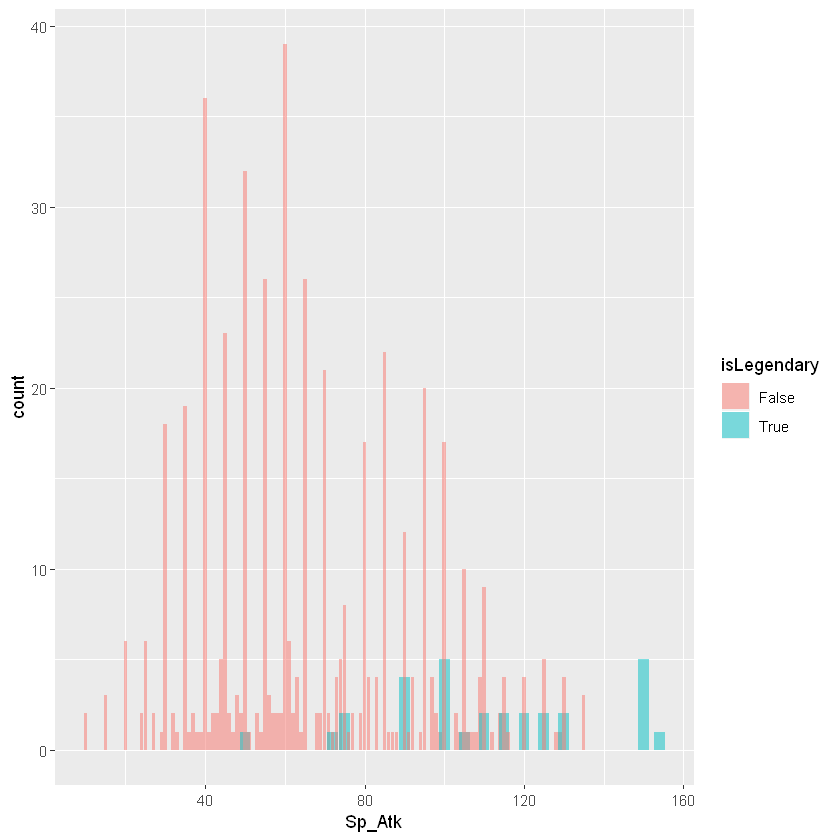

In [15]:
ggplot(train,aes(Sp_Atk,fill=isLegendary)) + geom_bar(alpha=0.5)

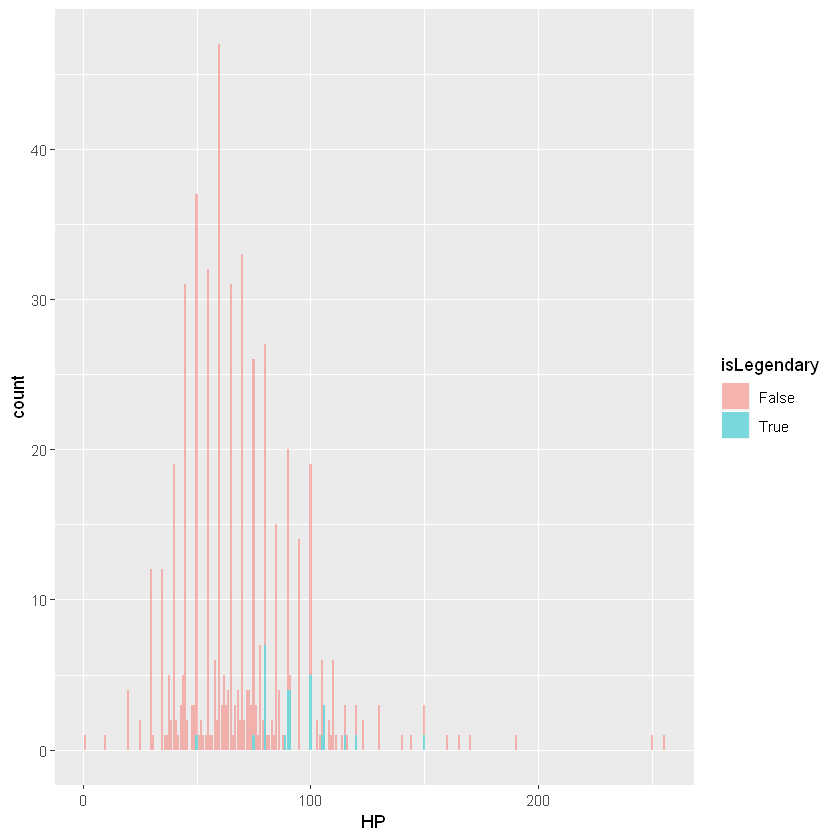

In [16]:
ggplot(train,aes(HP,fill=isLegendary)) + geom_bar(alpha=0.5)

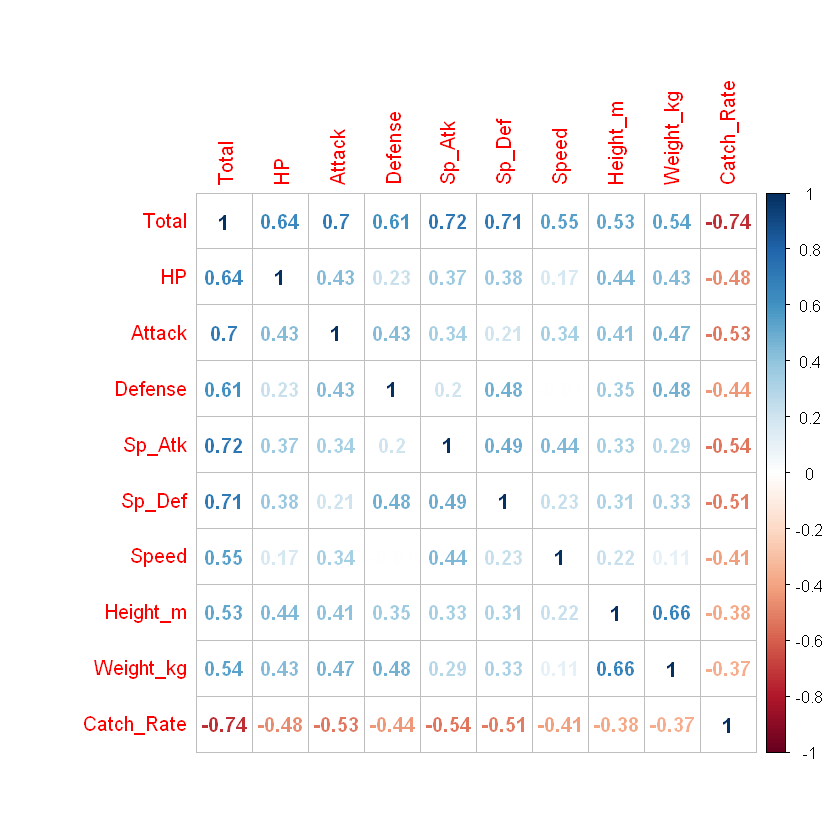

In [23]:
corrplot(cor(df[c(1,2,3,4,5,6,7,10,11,12)]),method = 'number')

Warning message:
"position_stack requires non-overlapping x intervals"

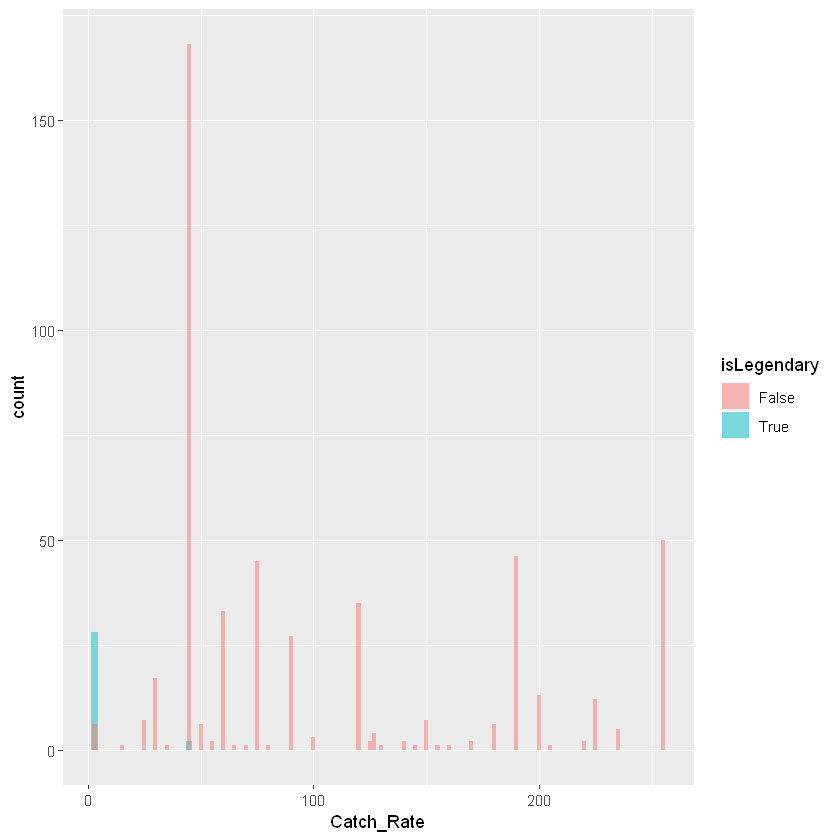

In [24]:
ggplot(train,aes(Catch_Rate,fill=isLegendary)) + geom_bar(alpha=0.5)

In [37]:
tree <- rpart(isLegendary ~ Height_m+Weight_kg+Catch_Rate,data = train,method = 'class')

In [38]:
summary(tree)

Call:
rpart(formula = isLegendary ~ Height_m + Weight_kg + Catch_Rate, 
    data = train, method = "class")
  n= 540 

         CP nsplit rel error    xerror       xstd
1 0.7333333      0 1.0000000 1.0000000 0.17743022
2 0.0100000      1 0.2666667 0.2666667 0.09357992

Variable importance
Catch_Rate  Weight_kg 
        92          8 

Node number 1: 540 observations,    complexity param=0.7333333
  predicted class=False  expected loss=0.05555556  P(node) =1
    class counts:   510    30
   probabilities: 0.944 0.056 
  left son=2 (506 obs) right son=3 (34 obs)
  Primary splits:
      Catch_Rate < 9     to the right, improve=42.800120, (0 missing)
      Weight_kg  < 171.5 to the left,  improve=12.161830, (0 missing)
      Height_m   < 1.855 to the left,  improve= 8.065844, (0 missing)
  Surrogate splits:
      Weight_kg < 310   to the left,  agree=0.943, adj=0.088, (0 split)

Node number 2: 506 observations
  predicted class=False  expected loss=0.003952569  P(node) =0.937037
    class 

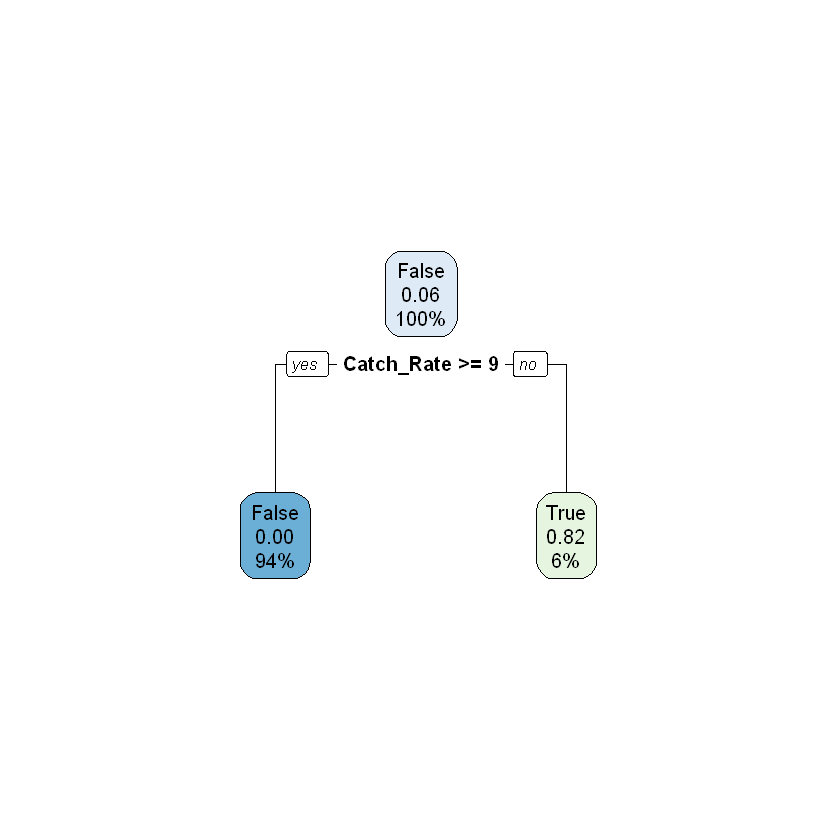

In [49]:
rpart.plot(tree)

In [74]:
treepred <- predict(tree,test,method='class')


In [84]:
confusionMatrix(as.factor(treepred),test$isLegendary)

ERROR: Error in confusionMatrix.default(as.factor(treepred), test$isLegendary): the data cannot have more levels than the reference


In [75]:
set.seed(1234567)
randmodel <- randomForest(isLegendary~ Height_m+Weight_kg+Catch_Rate,train,ntree = 2000, mtry = 6, importance = TRUE)

Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"

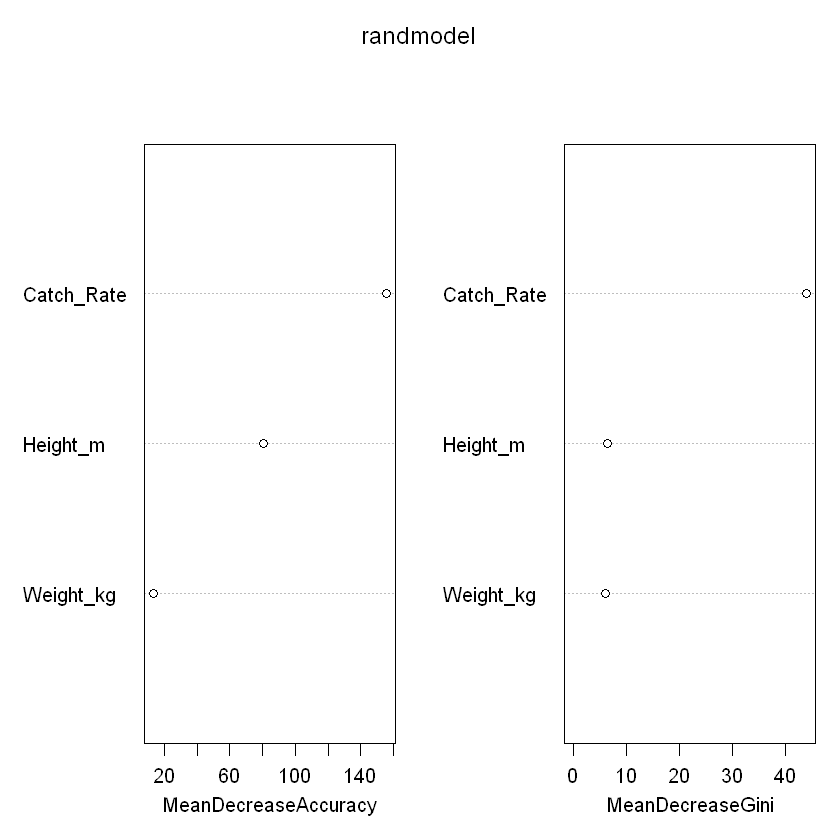

In [76]:
varImpPlot(randmodel)

In [77]:
summary(randmodel)

                Length Class  Mode     
call               6   -none- call     
type               1   -none- character
predicted        540   factor numeric  
err.rate        6000   -none- numeric  
confusion          6   -none- numeric  
votes           1080   matrix numeric  
oob.times        540   -none- numeric  
classes            2   -none- character
importance        12   -none- numeric  
importanceSD       9   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                540   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [78]:
rndpre <- predict(randmodel,test,type='class')
test$rndpred <- NULL

In [79]:
str(test)

'data.frame':	181 obs. of  12 variables:
 $ Total      : int  405 205 205 395 251 262 288 320 300 450 ...
 $ HP         : int  59 50 45 65 40 40 35 35 50 75 ...
 $ Attack     : int  63 20 25 90 45 60 60 55 75 100 ...
 $ Defense    : int  80 55 50 40 40 30 44 40 85 110 ...
 $ Sp_Atk     : int  65 25 25 45 35 31 40 50 20 45 ...
 $ Sp_Def     : int  80 25 25 80 35 31 54 50 30 55 ...
 $ Speed      : int  58 30 35 75 56 70 55 90 40 65 ...
 $ isLegendary: Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ hasGender  : Factor w/ 2 levels "False","True": 2 2 2 2 2 2 2 2 2 2 ...
 $ Height_m   : num  0.99 0.71 0.61 0.99 0.3 0.3 2.01 0.41 0.61 0.99 ...
 $ Weight_kg  : num  22.5 9.9 10 29.5 1.8 2 6.9 6 12 29.5 ...
 $ Catch_Rate : int  45 120 120 45 255 255 255 190 255 90 ...


In [80]:
test %>% filter(as.numeric(rndpred)==2) %>% count()

n
<int>
15


In [81]:
confusionMatrix(rndpred,test$isLegendary)

Confusion Matrix and Statistics

          Reference
Prediction False True
     False   164    2
     True      1   14
                                          
               Accuracy : 0.9834          
                 95% CI : (0.9523, 0.9966)
    No Information Rate : 0.9116          
    P-Value [Acc > NIR] : 5.614e-05       
                                          
                  Kappa : 0.8942          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9939          
            Specificity : 0.8750          
         Pos Pred Value : 0.9880          
         Neg Pred Value : 0.9333          
             Prevalence : 0.9116          
         Detection Rate : 0.9061          
   Detection Prevalence : 0.9171          
      Balanced Accuracy : 0.9345          
                                          
       'Positive' Class : False           
                     